# Assignment 3 - Supervised Learning

## *Kate Coulter*
Netid:  *kvc6*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?



#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**
#### Part 1 - Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.
**(a)** To find the likelihood function of the data we wish to maximize, we first define a probability mass function for a binary classification as:


\begin{equation} P(y | x ; \theta) = 
\begin{cases} h_{\theta}(x) & y = 1 \\
1 - h_{\theta}(x) & y = 0
\end{cases}
\end{equation}


&nbsp;&nbsp;&nbsp;&nbsp; This can be combined as:

$$ P(Y = y | X = x ; \theta) = h_{\theta}(x)^{y} \left( 1 - h_{\theta}(x) \right)^{(1-y)}$$

&nbsp;&nbsp;&nbsp;&nbsp; Thus using our parameters and assuming data independence, we are given the likelihood function:

$$ L(T) = \prod_{i=1}^{n} P(x_i | y_i) = \prod_{i=1}^{n} \left[ \sigma(w^T x_i)^{y_i} \left( 1 - \sigma(w^T x_i) \right)^{(1-y_i)} \right] $$


**(b)** Express the likelihood function found above as a cost function of the model parameters $C(w)$ such that it is the negative of the logarithm of the likelihood function.

\begin{equation} 
C(w) = 
\begin{cases} 
-\ln(\sigma(w^T x_i)) & y = 1 \\
-\ln(1 - \sigma(w^T x_i)) & y = 0
\end{cases}
\end{equation}

&nbsp;&nbsp;&nbsp;&nbsp; And we find $C(w) = LL(T) = \ln L(T)$ as:

$$
LL(T) = \ln L(T) = \sum_{i=1}^n \left[ y_i \ln\sigma(w^T x_i) + (1 - y_i) \ln(1-\sigma(w^T x_i)) \right]
$$

**(c)** Calculate the gradient of the cost function with respect to the model parameters.

$$
\begin{align}
\frac{\partial C}{\partial w_0} &= \frac{\partial}{\partial w_0} y \ln \sigma(w^T x) + \frac{\partial}{\partial w_0} (1 - y) \ln(1 - \sigma(w^Tx)) \\
&= \left[ \frac{y}{\sigma(w^T x)} - \frac{1-y}{1-\sigma(w^T x)} \right] \frac{\partial}{\partial w_0} \sigma(w^T x) \\
&= \left[ \frac{y}{\sigma(w^T x)} - \frac{1-y}{1-\sigma(w^T x)} \right] \sigma(w^T x) [1 - \sigma(w^T x)] x_0 \\
&= \left[ \frac{y - \sigma(w^T x)}{\sigma(w^T x)[1 - \sigma(w^T x)]} \right] \sigma(w^T x)[1 - \sigma(w^T x)] x_0 \\
&= [y - \sigma(w^Tx)] x_0
\end{align}
$$


&nbsp;&nbsp;&nbsp;&nbsp; We use this method for each parameter, resulting in:

$$
\nabla_w C(w) = \left[ (y - \sigma(w^T x_0)) x_0), (y - \sigma(w^T x_1)) x_1), (y - \sigma(w^T x_2)) x_2) \right]
$$

**(d)** Thus we have the following gradient descent update equation:

$$ \theta_j = \theta_{j-1} - \eta \nabla_w(\theta_{j-1})$$

&nbsp;&nbsp;&nbsp;&nbsp; where $\theta_j = C(w)$.

#### Part 2 - Prepare and plot your data

In [171]:
#e 
#load the data - A3_Q1_data.csv
import os
import pandas as pd
os.getcwd()
df = pd.read_csv("A3_Q1_data.csv")


In [172]:
#scatter plot colored by class value
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pylab as pylab
params = {'font.size': 12,
          'figure.figsize': (9, 7),
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'axes.grid': 'false'}
pylab.rcParams.update(params)


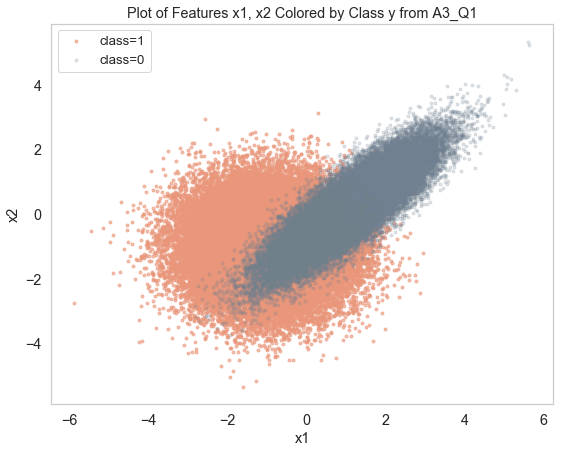

In [173]:
#mpl.rcParams['figure.figsize'] = (9,7)
#mpl.rcParams.update({'font.size': 8})
plt.grid(False)
plt.scatter(df.x1[df.y==1], df.x2[df.y==1], marker = '.', c = 'darksalmon', label = 'class=1',alpha=0.6)
plt.scatter(df.x1[df.y==0], df.x2[df.y==0], marker = '.', c = 'slategrey', label = 'class=0',alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of Features x1, x2 Colored by Class y from A3_Q1')
plt.legend()
plt.show()

(e) continued - 

The data does not seem to be separable as quite a bit of data is overlaid on top of each other, as you can see by the clear overlap in the two classes around the origin (0,0). This indicates that logistic regression would be a good choice for these data as it calculates the probability of class for each point based on its independent features x1 and x2. Unlike k-nearest neighbor, it does not categorize points based on a decision boundary, which would be a poor choice in this case.

In [174]:
# f 
#check for distribution/scale of features
df.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


In [175]:
#check for missing values
df.isna().all()

x1    False
x2    False
y     False
dtype: bool

(f) continued - 

As shown above, there are no missing values in this dataset. The features also have minimums and maximums that are close to each other thus having similar ranges, similar scales, similar distributions, and the classes are equally distributed. For these reasons we do not think any transformations are needed for this data.

#### Part 3 - Implement gradient descent and your logistic regression algorithm

In [176]:
# g
x = np.array(df[['x1','x2']])
y = np.array(df['y']).reshape(1,-1)
xT = x.T
row1 = np.ones((1,x.shape[0])) 
xT = np.r_[row1, xT]
w = np.random.random((1,3))

# create function to implement logistic regression
def sigmoid(w,x):
    #inputs parameter vector w, observation vector x
    #returns probability of success (class confidence probs)
    wx = np.dot(w,x)
    return 1 / (1 + np.exp(-wx))


In [177]:
# test function
print(x.shape)
prob = sigmoid(w, xT)
print("log test: prob = ", prob)

(100000, 2)
log test: prob =  [[0.7567656  0.49477378 0.51172861 ... 0.61225775 0.72181665 0.26763755]]


In [178]:
# h 
# create function that computes cost function 

def cost(n,y,prob):
    #inputs number of observations n, response vector y, probability for each observation prob
    #returns likelihood as cost function for dataset with labels
    return -1/n* np.sum(y * np.log(prob) + (1-y)* np.log(1-prob))

#test function
delta = cost(x.shape[0], y, prob)
print("cost test: delta = ", delta)

cost test: delta =  0.9867403804249801


In [179]:
# i 
# function so data is in correct format

def pretty(df_v2):
    x_v2 = np.array(df_v2[['x1', 'x2']])
    y_v2 = np.array(df_v2['y']).reshape(1,-1)
    
    xTv2 = x_v2.T
    row1 = np.ones((1, x_v2.shape[0]))
    xTv2 = np.r_[row1, xTv2]
    return xTv2, y_v2

# label test and training data as such

train = df.sample(frac = 0.7, random_state=200)

test = df.drop(train.index)

In [180]:
# create function to run gradient descent on training data

def gradient(x, w, y, learn):
    
    #inputs training data x, w, y as defined above
    #inputs learning rate learn
    #returns gradient descent on data
    
    wshape = w.shape
    w = np.random.random(wshape)
    wold = w
    wnew = w
    dist = 1
    iteration = 0
    sig = 0
    
    wset = []
    
    while dist > 1e-6:
        wold = wnew
        sig = sigmoid(wold,x)
        grad = np.dot((sig - y), x.T)/x.shape[1]
        wnew = wold - learn * grad
        dist = np.linalg.norm(wnew - wold)
        wset.append(wnew)

    return wset


In [181]:

# test function
grade = gradient(xT, w, y, 0.4)[-1]
print("gradient test: learning rate 0.4 = ", grade[-1])


gradient test: learning rate 0.4 =  [-0.18390586 -1.92566633 -0.41751481]


In [182]:
# j
# create function to calculate the cost function for each set of estimates w

def costatw(wset, xtest, ytest):
    iteration = 0
    costs = []
    for each in wset:
        costs.append(cost(xtest.shape[1], ytest, sigmoid(each, xtest)))
        
    return costs


In [183]:
# separate test and training data
train = df.sample(frac=0.7, random_state = 200)
test = df.drop(train.index)

In [184]:
# k 
# process with diff learning rates 
xT_train, y_train = pretty(train)
xT_test, y_test = pretty(test)
# learning rate = 0.1
w_1lr = gradient(xT_train, w, y_train, 0.1)
train_1c = costatw(w_1lr, xT_train, y_train)
test_1c = costatw(w_1lr, xT_test, y_test)

#learning rate = 0.2
w_2lr = gradient(xT_train, w, y_train, 0.2)
train_2c = costatw(w_2lr, xT_train, y_train)
test_2c = costatw(w_2lr, xT_test, y_test)

#learning rate = 0.5
w_5lr = gradient(xT_train, w, y_train, 0.5)
train_5c = costatw(w_5lr, xT_train, y_train)
test_5c = costatw(w_5lr, xT_test, y_test)

#learning rate = 0.8
w_8lr = gradient(xT_train, w, y_train, 0.8)
train_8c = costatw(w_8lr, xT_train, y_train)
test_8c = costatw(w_8lr, xT_test, y_test)

y_train.shape

(1, 70000)

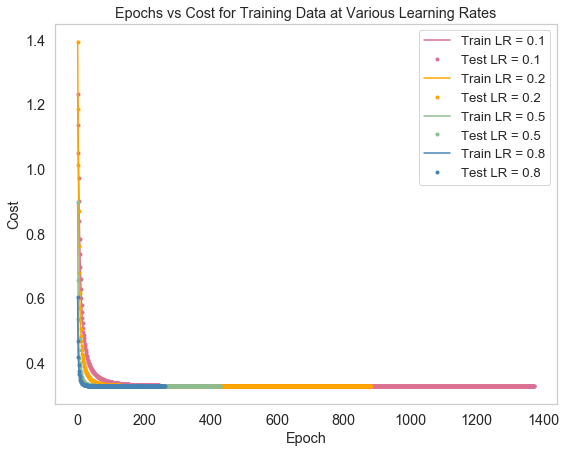

In [185]:
# plot costs as function of iteration 
plt.plot(train_1c, '-', c = 'palevioletred', label = 'Train LR = 0.1')
plt.plot(test_1c, '.', c = 'palevioletred', label='Test LR = 0.1')

plt.plot(train_2c, '-', c = 'orange', label = 'Train LR = 0.2')
plt.plot(test_2c, '.', c = 'orange', label='Test LR = 0.2')

plt.plot(train_5c, '-', c = 'darkseagreen', label = 'Train LR = 0.5')
plt.plot(test_5c, '.', c = 'darkseagreen', label='Test LR = 0.5')

plt.plot(train_8c, '-', c = 'steelblue', label = 'Train LR = 0.8')
plt.plot(test_8c, '.', c = 'steelblue', label='Test LR = 0.8')

plt.legend()

plt.title("Epochs vs Cost for Training Data at Various Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Cost")

plt.show()

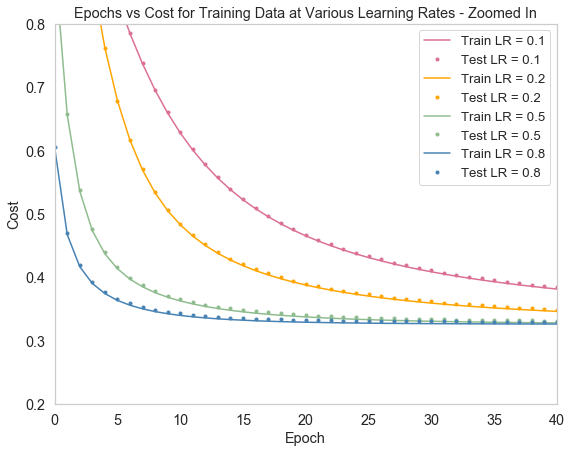

In [186]:
# change scale so that we can see what is actually going on
plt.plot(train_1c, '-', c = 'palevioletred', label = 'Train LR = 0.1')
plt.plot(test_1c, '.', c = 'palevioletred', label='Test LR = 0.1')

plt.plot(train_2c, '-', c = 'orange', label = 'Train LR = 0.2')
plt.plot(test_2c, '.', c = 'orange', label='Test LR = 0.2')

plt.plot(train_5c, '-', c = 'darkseagreen', label = 'Train LR = 0.5')
plt.plot(test_5c, '.', c = 'darkseagreen', label='Test LR = 0.5')

plt.plot(train_8c, '-', c = 'steelblue', label = 'Train LR = 0.8')
plt.plot(test_8c, '.', c = 'steelblue', label='Test LR = 0.8')

plt.legend()
plt.xlim(0,40)
plt.ylim(0.2,0.8)

plt.title("Epochs vs Cost for Training Data at Various Learning Rates - Zoomed In")
plt.xlabel("Epoch")
plt.ylabel("Cost")

plt.show()

(k) continued - 

The impact of our chosen parameter learning rate is that as our learning rate increases, the associated cost decreases faster. This observation makes sense given the definition of learning rate. All training cases performed well for the test case regardless of the learning rate. 

As is typical for many machine learning problems, when choosing a learning rate there is a trade off between efficiency and accuracy. Again, if we set our learning rate at a small value, the cost reduction is slower than if we set the learning rate at a high value. To balance this trade off, we will choose a learning rate of 0.5 so that the program will run at an acceptable rate while still considering the importance of efficiency and accuracy.

#### Part 4 - Test your model performance through cross validation

In [187]:
# l
#cross validation
# use k folds where k = 3
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
skf = StratifiedKFold(n_splits=3, shuffle = True)
w = np.random.random((1,3))
yhats = np.empty(y_train.squeeze().shape[0],dtype='object')
xtrain = xT_train.T
ytrain = y_train.squeeze()

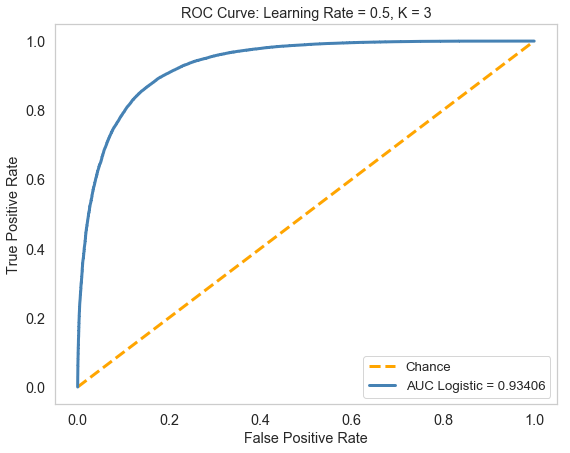

In [188]:
#format and train / apply so can use
for i, j in skf.split(xtrain, ytrain):
    x_i, x_j = xtrain[i], xtrain[j]
    y_i = ytrain[i]
    x_i = x_i.T
    x_j = x_j.T
    y_i = y_i.reshape(1,-1)
    weights = gradient(x_i, w, y_i, 0.5)
    yhat = sigmoid(weights[-1], x_j)
    yhats[j] = yhat[0,:]
auc = metrics.roc_auc_score(ytrain, yhats)
fpr, tpr, thresh = metrics.roc_curve(ytrain, yhats, pos_label=1)

legend_string = 'AUC Logistic = {:0.5f}'.format(auc)

plt.plot([0,1],[0,1],'--', color='orange', linewidth=3, label='Chance') 
plt.plot(fpr, tpr, color='steelblue', linewidth=3, label=legend_string) 
plt.title('ROC Curve: Learning Rate = 0.5, K = 3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<div></div>

**(m)** We use cross validation as a method to evaluate the predictive performance of our classification model. It also can aid in preventing overfit with our training data. This type of method allows us to see how our model may perform out of sample or how our model might perform on another test set. Cross validation extends the performance evaluation we can do on our model 

In [192]:
# n 
# plot training data and test data with decision boundary
step = 0.02

x1_min, x1_max = xT_train.T[:, 1].min() - 1, xT_train.T[:, 1].max() + 1
x2_min, x2_max = xT_train.T[:, 2].min() - 1, xT_train.T[:, 2].max() + 1
x1test_min, x1test_max = xT_test.T[:, 1].min() - 1, xT_test.T[:, 1].max() + 1
x2test_min, x2test_max = xT_test.T[:, 1].min() - 1, xT_test.T[:, 1].max() + 1

xx1train, xx2train = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
grid_train = np.c_[np.ones(xx1train.ravel().shape[0]),xx1train.ravel(), xx2train.ravel()].T
grid_predict = sigmoid(w_5lr[-1], grid_train)
grid_predict = grid_predict.reshape((xx1train.shape))

xx1test, xx2test = np.meshgrid(np.arange(x1test_min, x1test_max, step), np.arange(x2test_min, x2test_max, step))
grid_test = np.c_[np.ones(xx1test.ravel().shape[0]),xx1test.ravel(), xx2test.ravel()].T
grid_predict2 = sigmoid(w_5lr[-1], grid_test)
grid_predict2 = grid_predict2.reshape((xx1test.shape))

xx1train.shape
xx2train.shape
xx2test.shape

ytrain.shape

(70000,)

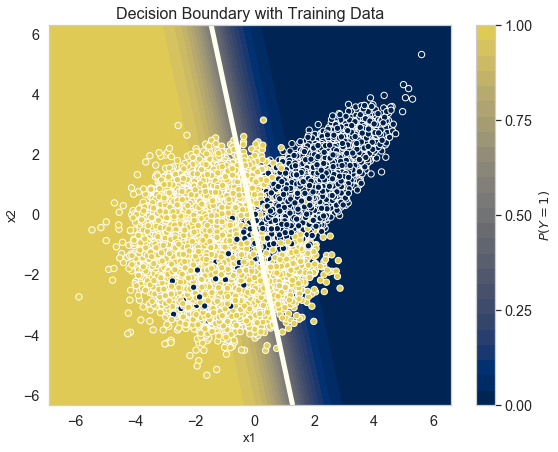

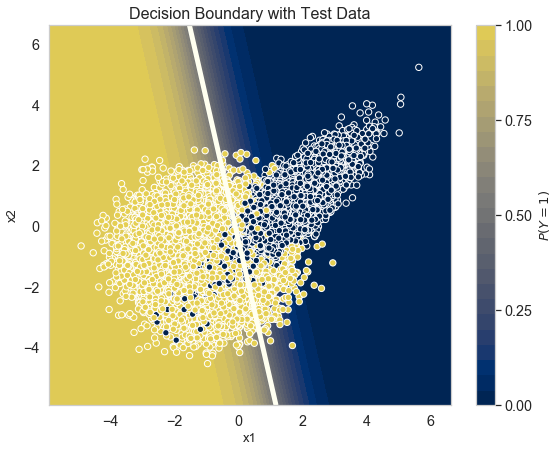

In [199]:

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('cividis')
test = truncate_colormap(cmap, 0, 0.9)

con = plt.contourf(xx1train,xx2train,grid_predict,25,cmap=test, vmin = 0, vmax = 1)
cbar = plt.colorbar(con)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
cbar.set_label("$P(Y = 1)$", fontsize=13)
plt.title("Decision Boundary with Training Data", fontsize=16)
plt.xlabel("x1", fontsize=13)
plt.ylabel("x2", fontsize=13)
plt.scatter(xT_train.T[:,1], xT_train.T[:,2], c = ytrain, s=40, cmap=test, linewidth=1,edgecolor='white')
plt.contour(xx1train, xx2train, grid_predict, [0.5], linewidths=5, colors='ivory')
plt.show()


con = plt.contourf(xx1test,xx2test,grid_predict2,25,cmap=test, vmin = 0, vmax = 1)
cbar = plt.colorbar(con)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
cbar.set_label("$P(Y = 1)$", fontsize=13)
plt.title("Decision Boundary with Test Data", fontsize=16)
plt.xlabel("x1", fontsize=13)
plt.ylabel("x2", fontsize=13)
plt.scatter(xT_test.T[:,1], xT_test.T[:,2], c = y_test.squeeze(), s=40, cmap=test, linewidth=1,edgecolor='white')
plt.contour(xx1test, xx2test, grid_predict2, [0.5], linewidths=5, colors='ivory')



(n) continued -

Based on the two plots shown above, it is clear that our model and decision boundary could certainly be improved. There are obvious mis-classifications and the shape of the data, particularly of class 0 which has a much steeper slope compared to class 1, doesn't seem to be a truly linear fit. However, this decision boundary is not terrible and it fits the data as well as it can without overfitting given our available tools.

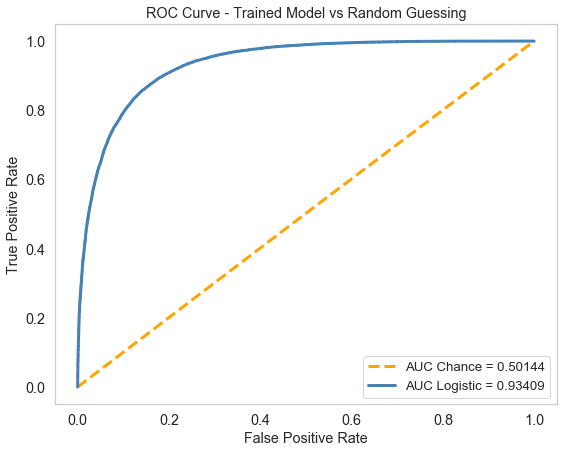

Our trained logistic model has an AUC score that is  1.8628007367960724  times better than a model using random chance.


In [200]:
# o

skf = StratifiedKFold(n_splits=3, shuffle = True)
w = np.random.random((1,3))

yhats = np.empty(y_train.squeeze().shape[0],dtype='object')

xtrain = xT_train.T
ytrain = y_train.squeeze()

#format and train / apply so can use
for i, j in skf.split(xtrain, ytrain):
    x_i, x_j = xtrain[i], xtrain[j]
    y_i = ytrain[i]
    x_i = x_i.T
    x_j = x_j.T
    y_i = y_i.reshape(1,-1)
    weights = gradient(x_i, w, y_i, 0.5)
    yhat = sigmoid(weights[-1], x_j)
    yhats[j] = yhat[0,:]
    
auc_log = metrics.roc_auc_score(ytrain, yhats)
fpr, tpr, thresh = metrics.roc_curve(ytrain, yhats, pos_label=1)
legend_strlog = 'AUC Logistic = {:0.5f}'.format(auc_log)
fpr_diag, tpr_diag, tresh_diag = metrics.roc_curve(ytrain, np.random.randint(2,size = yhats.shape[0]), pos_label=1)
auc_guess = metrics.roc_auc_score(ytrain, np.random.randint(2,size = yhats.shape[0]))
legend_strguess = 'AUC Chance = {:0.5f}'.format(auc_guess)

howmuchbetter = auc_log/auc_guess
plt.plot(fpr_diag, tpr_diag, '--', label=legend_strguess, linewidth = 3, color="orange")
plt.plot(fpr,tpr,label = legend_strlog, linewidth = 3, color='steelblue')
plt.title('ROC Curve - Trained Model vs Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Our trained logistic model has an AUC score that is ', howmuchbetter, ' times better than a model using random chance.')


(o) continued - 

Our trained logistic model achieves an AUC score of 0.93404 as compared to an AUC score of only 0.49864 for a model that simply uses chance. Despite its flaws, our model is still a success in that it has an AUC score that is 1.874 times higher than that of a chance diagonal.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [26]:
# a 
# upload and format data
import pandas as pd

from mlxtend.data import loadlocal_mnist
x_train, y_train = loadlocal_mnist(
        images_path='train-images-idx3-ubyte', 
        labels_path='train-labels-idx1-ubyte')

x_test, y_test = loadlocal_mnist(
        images_path='t10k-images-idx3-ubyte', 
        labels_path='t10k-labels-idx1-ubyte')

#make labels binary so that class 1 are pictures of '3's
import numpy as np
y_train_binary = (y_train == 3).astype(np.int)
y_test_binary = (y_test == 3).astype(np.int)


In [28]:
#summary of datasets and dimensions
print("x_train - image training data - ", x_train.shape)
print("y_train - label training data - ", y_train.shape)
print("x_test - image test data - ", x_test.shape)
print("y_test - label test data - ", y_test.shape)
print("y_train_binary: ", y_train_binary.shape)
print("y_test_binary: ", y_test_binary.shape)

image = np.concatenate((x_train, x_test))
labelraw = np.concatenate((y_train, y_test))
label = np.concatenate((y_train_binary, y_test_binary))
print("All Image Data - image - ", image.shape)
print("All Label Data - label - ", label.shape)

x_train - image training data -  (60000, 784)
y_train - label training data -  (60000,)
x_test - image test data -  (10000, 784)
y_test - label test data -  (10000,)
y_train_binary:  (60000,)
y_test_binary:  (10000,)
All Image Data - image -  (70000, 784)
All Label Data - label -  (70000,)


In [29]:
imagedf = pd.DataFrame(image)
labeldf = pd.DataFrame(label)
labeldf = labeldf.rename(columns={0: 'class'})
data = pd.concat([labeldf, imagedf], axis = 1, join='inner')

#combined dataframes
print("Image DF - imagedf - ", imagedf.shape)
print("Label DF - label - ", labeldf.shape)
print("DF - data - ", data.shape)

Image DF - imagedf -  (70000, 784)
Label DF - label -  (70000, 1)
DF - data -  (70000, 785)


In [30]:
#convert to arrays
train_img = np.array(x_train)
train_label = np.array(y_train)
test_img = np.array(x_test)
test_label = np.array(y_test)

print(len(train_img))
print(train_img.shape)
print(len(train_label))
print(train_label.shape)
print(len(test_img))
print(test_img.shape)
print(len(test_label))
print(test_label.shape)


60000
(60000, 784)
60000
(60000,)
10000
(10000, 784)
10000
(10000,)


In [31]:

# make shape of image reflect size of image
train_img28 = train_img.reshape(60000,28,28)
test_img28 = test_img.reshape(10000,28,28)

# make binary classifier
train_label2 = np.where(train_label == 3, 1, 0)
test_label2 = np.where(test_label == 3, 1, 0)

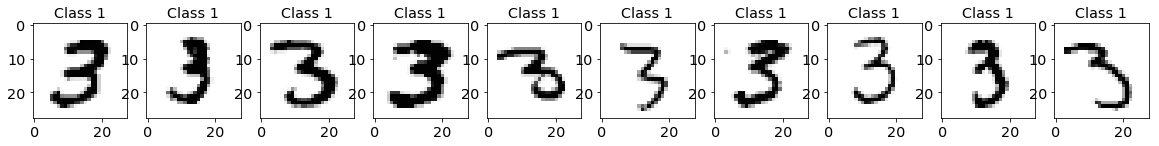

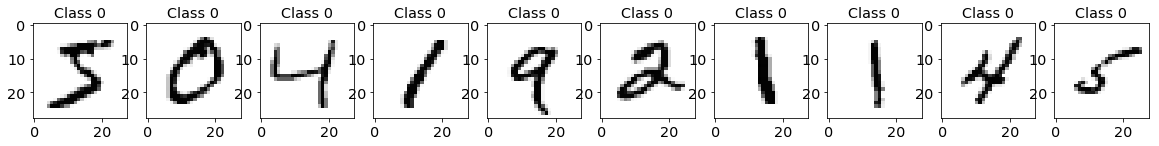

In [32]:
# b
# create subsets from training data
positive = train_img28[train_label2 == 1]
negative = train_img28[train_label2 == 0]
#print(positive.shape)

fig1, axes1 = plt.subplots(1,10, figsize=(20,20))
fig2, axes2 = plt.subplots(1,10,figsize=(20,20))

for i in range(10):
    axes1[i].set_title('Class 1')
    axes1[i].imshow(positive[i], cmap='Greys')

for i in range(10):
    axes2[i].set_title('Class 0')
    axes2[i].imshow(negative[i], cmap='Greys')
    

In [33]:
# c
print("Training Set Positive Examples: ", sum(train_label2))
print("Training Set Negative Examples: ", np.count_nonzero(train_label2==0))
print('='*30)
print("Test Set Positive Examples: ", sum(test_label2))
print("Test Set Negative Examples: ", np.count_nonzero(test_label2==0))
print('='*30)
labels = np.array(labeldf)
print("Total Positive Examples: ", np.count_nonzero(labels==1))
print("Total Negative Examples: ", np.count_nonzero(labels==0))
print('='*30)

Training Set Positive Examples:  6131
Training Set Negative Examples:  53869
Test Set Positive Examples:  1010
Test Set Negative Examples:  8990
Total Positive Examples:  7141
Total Negative Examples:  62859


(c) continued - 

There are 53,869 Class 0 and 6,131 Class 1 examples within the Training Dataset (about 90% of the data in the training set is labeled 0), and 8,990 Class 0 and 1,010 Class 1 examples within the Test Dataset. If you consider the entire MNIST dataset before being broken into test and training sets, this gives 62,859 Class 0 and 7,141 Class 1 examples total. Regardless of which dataset you are interested in for checking balance, the classes in this case are not balanced for the 3 Classifier. Having imbalanced classes can lead to skewed results for our model, including low precision and wide confidence intervals. In this particular case, there are fewer observations to train the model for our positive class, so each false negative would lower recall by more than a false positive would for the true negative rate.

In [117]:
# d
# train and test classifier using cross validation

#reformat data

#classifier 1 - logistic regression
from sklearn.linear_model import LogisticRegression
logclass = LogisticRegression(random_state=323, solver='lbfgs', max_iter=200)
yhats = np.empty(train_label2.shape[0],dtype='object')

skf = StratifiedKFold(n_splits=3, shuffle = True)

# X has to have rows - observation, columns - variables, y - 1D
for i, j in skf.split(train_img, train_label2):
    x_i, x_j = train_img[i], train_img[j]
    y_i = train_label2[i]
    # Train the classifier
    logreg = logclass.fit(x_i,y_i)
    # Test the classifier on the validation data for this fold
    loghats = logclass.predict_proba(x_i)
    # Save the predictions for this fold
    yhats[i] = loghats[:,1]

In [100]:
print(train_label2.shape)
print(train_img.shape)
print(x_i.shape)
print(x_j.shape)
print(y_i.shape)
print(yhats.shape)


(60000,)
(60000, 784)
(40001, 784)
(19999, 784)
(40001,)
(60000,)


In [101]:
# get metrics for ROC Curve
fpr, tpr, thr = metrics.roc_curve(train_label2, yhats, pos_label=1)
auc = metrics.roc_auc_score(train_label2, yhats)
leglog = 'AUC = {:0.4f}'.format(auc)

#classifier 2 - random guess
MNISTrandom = np.random.randint(2, size = train_label2.shape[0])
fp2, tp2, thr2 = metrics.roc_curve(train_label2, MNISTrandom, pos_label=1)
auc2 = metrics.roc_auc_score(train_label2, MNISTrandom)
legguess = 'AUC = {:0.4f}'.format(auc2)

#classifier 3 - predict all as class 0
MNISTnegative = np.zeros(train_label2.shape)
fp3, tp3, thr3 = metrics.roc_curve(train_label2, MNISTnegative, pos_label=1)
auc3 = metrics.roc_auc_score(train_label2, MNISTnegative)
legnot3 = 'AUC = {:0.4f}'.format(auc3)


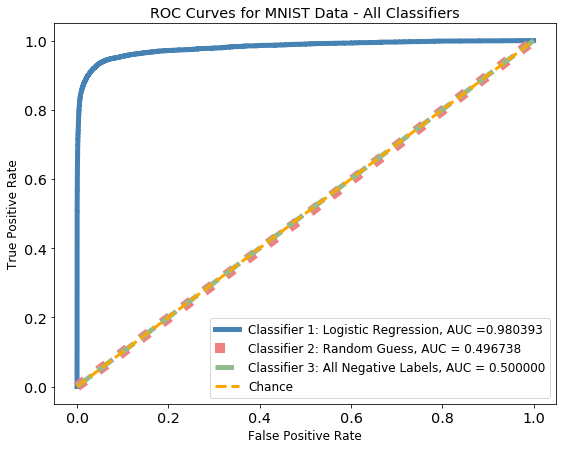

In [61]:
plt.plot(fpr, tpr, '-', color='steelblue', linewidth=5, 
         label='Classifier 1: Logistic Regression, AUC ={:2f}'.format(auc))
plt.plot(fp2, tp2, ':', linewidth = 10, color = 'lightcoral',
        label = 'Classifier 2: Random Guess, AUC = {:2f}'.format(auc2))
plt.plot(fp3, tp3, '--', linewidth = 5, color = 'darkseagreen',
        label = 'Classifier 3: All Negative Labels, AUC = {:2f}'.format(auc3))
plt.plot([0,1],[0,1],'--', linewidth=3, color='orange', label='Chance')
plt.title('ROC Curves for MNIST Data - All Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

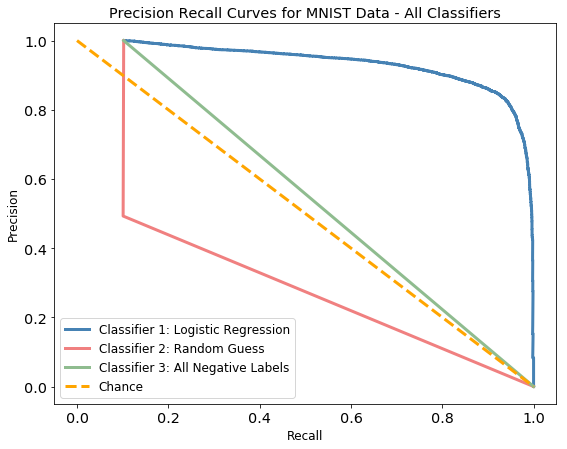

In [63]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score

precl,recl,thr1 = precision_recall_curve(train_label2, yhats, pos_label=1)
prec2,rec2,thr2 = precision_recall_curve(train_label2, MNISTrandom, pos_label=1)
prec3,rec3,thr3 = precision_recall_curve(train_label2, MNISTnegative, pos_label=1)

plt.plot(precl, recl, color = 'steelblue', linewidth = 3, label='Classifier 1: Logistic Regression')
plt.plot(prec2, rec2, color = 'lightcoral', linewidth = 3, label='Classifier 2: Random Guess')
plt.plot(prec3, rec3, color = 'darkseagreen', linewidth = 3,  label='Classifier 3: All Negative Labels')
plt.plot([0,1],[1,0],'--', color='orange', linewidth=3, label='Chance') 

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall Curves for MNIST Data - All Classifiers')
plt.legend()
plt.show()    

(d) continued - 

The three classifiers that were trained and tested on our data are a logistic regression classification, random guess, and a classifier that would predict every picture is not a '3', thus all would belong to Class 0. Shown above are the performances of three classifiers as well as the performance of sheer chance on our dataset. Our first plot that shows the ROC curves of each of the classifiers shows that with the exception of the classifier we chose, Logistic Regression, the other models performed similarly to the point where it is hard to discern which line is which due to their overlap. The ROC Curve indicates that Logistic Regression Classification performs well for this data, as our curve has an upward movement that places it close to the upper left hand corner at its peak. 

Unlike the ROC Curves, the Precision Recall Curves for each classifier is much more distinguishable. A curve that is close to the upper right hand corner of the plot is a good indication of performance in this type of graph, and again Logistic Regression seems to be the best classification method. Negative labels and random chance perform similarly and what seems to be the worst classification method by this metric is the method of random guess, but none of the latter three classifiers perform well enough to consider actually using.

In [64]:
#f
# create function to apply lasso regularization
from sklearn.metrics import f1_score, roc_auc_score
import warnings
def loglasso(C, test, label):
    params = []
    cost = []
    f1 = []
    auc = []
    cnt = 0
    
    #train classifier
    for c in C:
        with warnings.catch_warnings(): 
            warnings.simplefilter("ignore")
        cnt += 1
        ClassifierPenal = LogisticRegression(penalty='l1', random_state=323, C = c)
        penal = ClassifierPenal.fit(train_img, train_label2)
        labels = penal.predict(test)
        proba = penal.predict_proba(test)
        params.append(np.sum(np.isclose(penal.coef_, 0)))
        cost.append(-np.sum(np.log(proba**np.c_[1-label, label]))/label.shape)
        f1.append(f1_score(label, labels, pos_label=1))
        auc.append(roc_auc_score(label, proba[:,1]))
        
    return 28*28-np.array(params), cost, f1, auc

#vals = [C, cost, auc, f1, params]
#metric_str = ["Cost", "AUC", "F1 Score", "Coefficient Count"]

In [65]:
#apply to test data
import warnings; warnings.simplefilter('ignore')

C = np.logspace(-6,6,25)
#C = np.linspace(0.001, 2.5, 2)
metricvals = loglasso(C, test_img, test_label2)

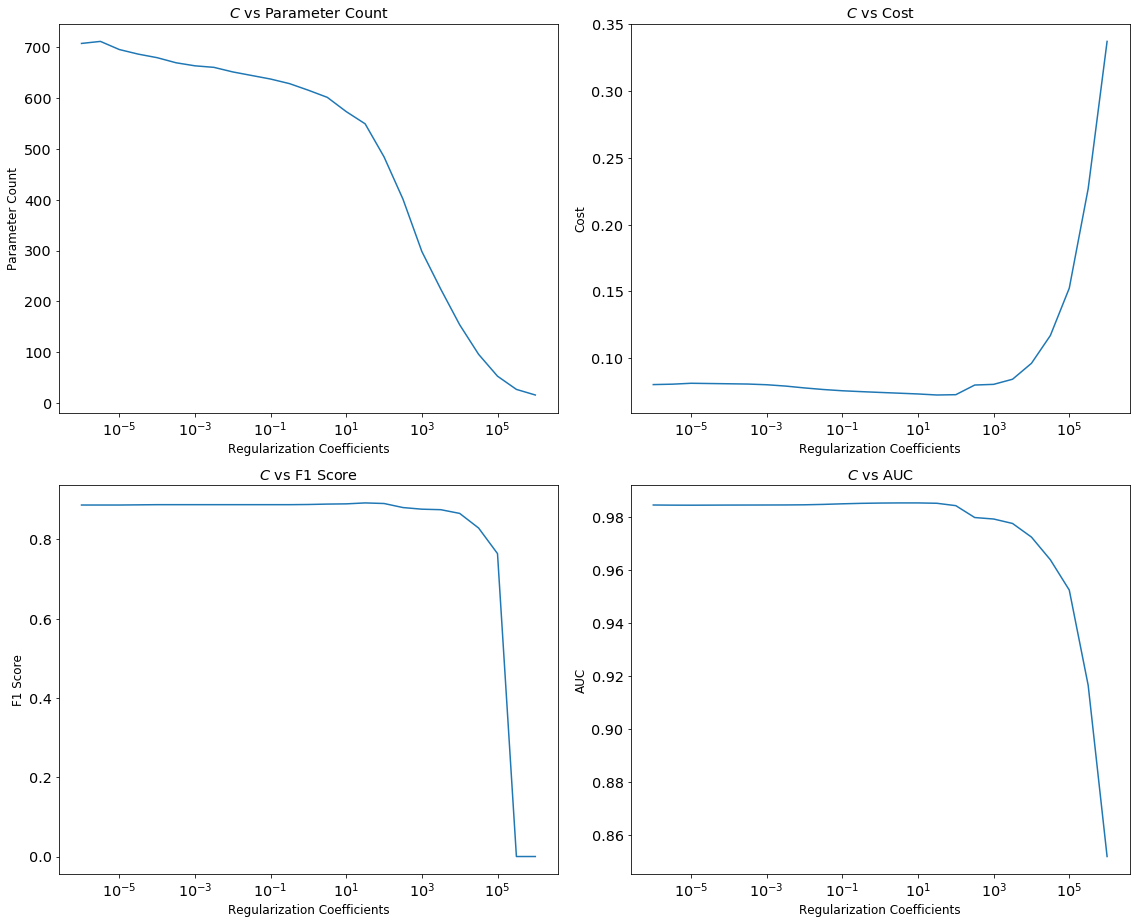

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(16,13))

names = ["Parameter Count", "Cost", "F1 Score", "AUC"]

axes[0][0].plot(C**(-1), metricvals[0],'-')
axes[0][0].set_xscale('log')
axes[0][0].set_title('$C$ vs Parameter Count')
axes[0][0].set_xlabel("Regularization Coefficients")
axes[0][0].set_ylabel(names[0])

axes[0][1].plot(C**(-1), metricvals[1],'-')
axes[0][1].set_xscale('log')
axes[0][1].set_title('$C$ vs Cost')
axes[0][1].set_xlabel("Regularization Coefficients")
axes[0][1].set_ylabel(names[1])

axes[1][0].plot(C**(-1), metricvals[2],'-')
axes[1][0].set_xscale('log')
axes[1][0].set_title('$C$ vs F1 Score')
axes[1][0].set_xlabel("Regularization Coefficients")
axes[1][0].set_ylabel(names[2])


axes[1][1].plot(C**(-1), metricvals[3],'-')
axes[1][1].set_xscale('log')
axes[1][1].set_title('$C$ vs AUC')
axes[1][1].set_xlabel("Regularization Coefficients")
axes[1][1].set_ylabel(names[3])

plt.tight_layout()
plt.show()

(f) continued - 

Above are plots depicting various metrics as the regularization coefficient is varied for our lasso regularization.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)** For this supervised learning exploration I have chosen to work with FiveThirtyEight's ongoing data collection effort entitled, *"Tracking Congress In the Age of Trump"*. This dataset tracks the support individual members of Congress have for President Trump. I am interested in social science issues that tend to end up needing NLP data for analyses, but I like many others have become fascinated with Trump's Presidency as well as the turbulent political environment that has followed. Congressional data is tricky to work with for many reasons,  particularly given the pacing of how the US political system allows items to progress. However, this dataset seems like an opportunity to address how machine learning techniques can be further applied to the social sciences, specifically political science. By working through this data and applying machine learning techniques to a dataset I am interested in and have domain knowledge to understand, I hope to come up with more ways that I can apply computational techniques to political questions. I will focus on trying to predict 

In [67]:
# b
# load data
import pandas as pd

trump = pd.read_csv("trump_congress1.csv")

print(trump.columns.values)
#print(trump.shape)
#print(trump.dtypes)
print('='*30)

#filter so only looking at records for members of the senate
trump = trump[trump['chamber'].isin(['senate'])]

#include relevant variables - congress, vote, trump_position, 
# last_name (label type), party, and agree
# others are redundant or irrelevant for our analysis

trump = trump.loc[:, ['congress', 'vote', 'trump_position', 'last_name', 'party', 'agree']]
#print(trump.columns.values)

print(trump.shape)
print('='*30)

#print(trump.dtypes)
print(trump.isna().all())
print('='*30)

print(trump.head())
print('='*30)

#no missing values, which is good

#make everything categorical
#trump = trump.astype('category')

#every variable is categorical, so need to get sense of how distribution is for general dataset
#through tables and barcharts

print(trump.groupby("agree").size())
print('='*30)

print(trump.groupby("vote").size())
print('='*30)

print(trump.groupby("trump_position").size())
print('='*30)

print(trump.groupby("party").size())
print('='*30)

print(trump.groupby("congress").size())
print('='*30)

['congress' 'bill_id' 'roll_id' 'chamber' 'voted_at' 'bioguide' 'vote'
 'trump_position' 'last_name' 'state' 'district' 'party' 'agree' 'yesno'
 'predicted_probability']
(8999, 6)
congress          False
vote              False
trump_position    False
last_name         False
party             False
agree             False
dtype: bool
     congress vote trump_position   last_name party  agree
431       115   No        support     Baldwin     D      0
432       115   No        support      Bennet     D      0
433       115   No        support  Blumenthal     D      0
434       115   No        support      Booker     D      0
435       115   No        support       Brown     D      0
agree
0    3628
1    5371
dtype: int64
vote
No         3149
Present     124
Yes        5726
dtype: int64
trump_position
oppose     1299
support    7700
dtype: int64
party
D    4161
I     179
R    4659
dtype: int64
congress
115    8400
116     599
dtype: int64


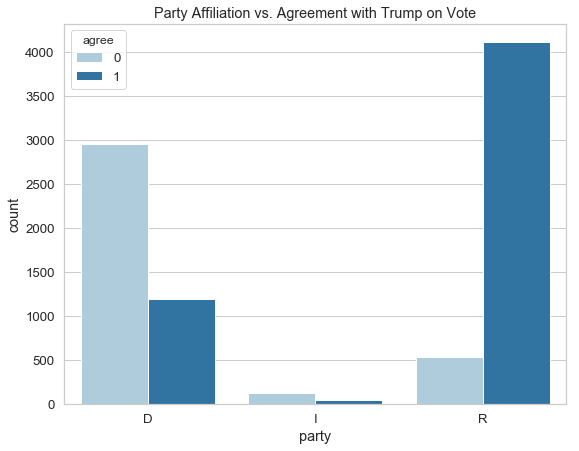

In [68]:

#data looks okay to proceed to plots with the exception of the vote category
import seaborn as sns
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (9,7)
sns.set(style="whitegrid", font_scale=1.2)
sns.set_palette("Paired")

#trump_table = pd.crosstab(index = trump)
#sns.countplot(x='party', hue='agree', data=trump, palette = 'hls')

plt.title('Party Affiliation vs. Agreement with Trump on Vote')
sns.countplot(x='party', hue='agree', data=trump)



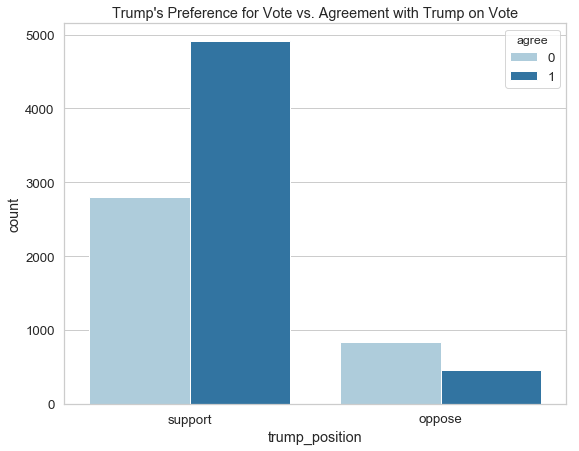

In [69]:
plt.title('Trump\'s Preference for Vote vs. Agreement with Trump on Vote')
sns.countplot(x='trump_position', hue='agree', data=trump)

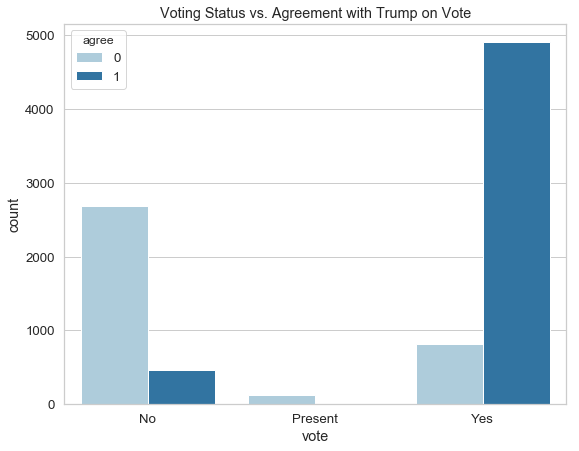

In [70]:
plt.title('Voting Status vs. Agreement with Trump on Vote')
sns.countplot(x='vote', hue='agree', data=trump)

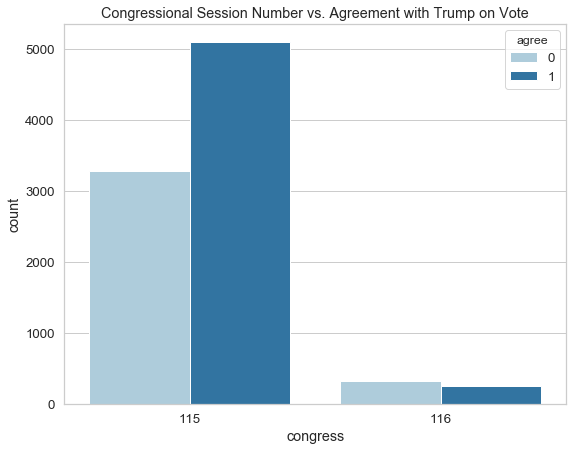

In [71]:
plt.title('Congressional Session Number vs. Agreement with Trump on Vote')
sns.countplot(x='congress', hue='agree', data=trump)

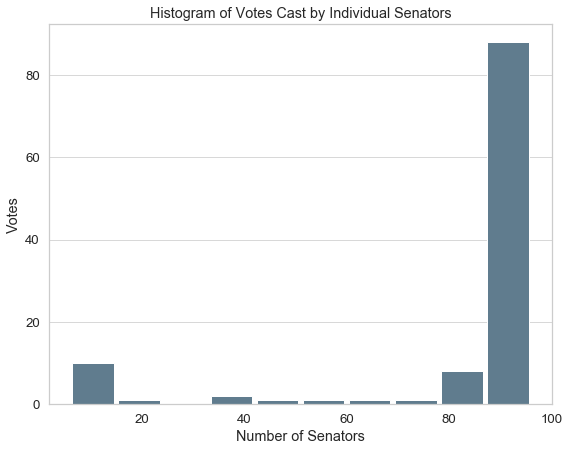

In [72]:
senfreq = (trump.groupby("last_name").size())
senfreq.plot.hist(grid = False, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of Votes Cast by Individual Senators')
plt.xlabel('Number of Senators')
plt.ylabel('Votes')
plt.grid(axis='y', alpha=0.75)

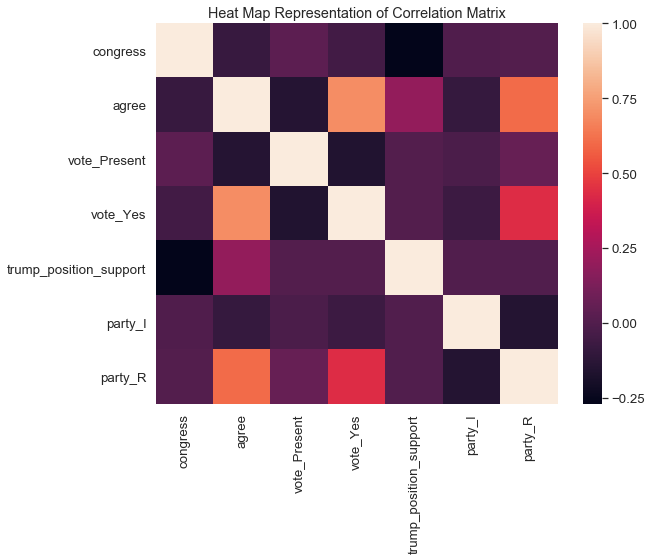

In [73]:
#plot correlations to see relationships between variables
trumpdummy = pd.get_dummies(trump[dummylist], drop_first = True)
corr = trumpdummy.corr()
ax = plt.axes()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax = ax)
ax.set_title('Heat Map Representation of Correlation Matrix')
plt.show()

In [74]:
print(corr)

                        congress     agree  vote_Present  vote_Yes  \
congress                1.000000 -0.084984      0.033448 -0.046465   
agree                  -0.084984  1.000000     -0.143820  0.701401   
vote_Present            0.033448 -0.143820      1.000000 -0.156343   
vote_Yes               -0.046465  0.701401     -0.156343  1.000000   
trump_position_support -0.269601  0.200661      0.005152  0.004959   
party_I                -0.002921 -0.088967     -0.016839 -0.067658   
party_R                 0.007033  0.606731      0.064484  0.438477   

                        trump_position_support   party_I   party_R  
congress                             -0.269601 -0.002921  0.007033  
agree                                 0.200661 -0.088967  0.606731  
vote_Present                          0.005152 -0.016839  0.064484  
vote_Yes                              0.004959 -0.067658  0.438477  
trump_position_support                1.000000  0.001899 -0.000301  
party_I                  

**(c)** The question I will investigate in this supervised learning exploration is as follows:

Given historical voting records as well as key identifiers of a senator, can you predict if that senator will vote with or against Trump's Agenda. My target variable is the variable "agree", a dummy variable that has two classes indicating if that particular vote was cast in harmony or against President Trump's agenda. For class = 0, the vote placed was not in agreement with what President Trump would have done and, for class = 1, the vote placed was in concordance with Trump's agenda and is a vote he too would have placed.

I will use the following variables to aid in my prediction:
-  congress: a binary variable coded 0 if this vote took place in the 115th congressional session or is coded 1 if this vote took place in the 116th congressional session
-  trump_position: a binary variable indicating President Trump's support for the bill being voted on for that data point, coded 0 if Trump opposed the bill passing and coded 1 if Trump supported the bill
-  party: a categorical variable indicating whether that senator is of the Democratic, Republic, or Independent political party
-  last_name: used as an index and for labeling purposes to identify potential outliers, has 113 possible values (1 for each senator that has been in office during President Trump's presidency), with a minimum count of votes of 6 and a maximum cast by one senator of 90
-  vote: the vote of that senator on a particular bill given a particular day. Categorical with 3 possible values: coded 0 if that senator did not vote in favor for the bill but instead cast a vote of nay, coded 1 if the senator voted in favor of that bill on that day thus casting a vote in favor of the bill, and coded 2 if their vote was recorded as being present, indicating that the senator was either not present for that vote but was in attendance for that senate session or that they purposefully abstained from voting, perhaps as a way of stating their opinion on the bill. Note that senators not physically present would automatically be recorded as a 0, or a vote against a bill.

My dataset required preprocessing in the sense that given it didn't have a codebook or dictionary, quite a bit of outside research had to be done to infer what each variable was actually measuring. There are no missing values for the datapoints included, which are those cast by senators. The dataset I will use dose not include votes cast by the House of Representatives due to the varying nature of how differently these bodies vote and behave. In the future a similar supervised learning exploration could be done using those data points, and perhaps should include variables I have filtered out as being erroneous for this case.

**(d)** I will use logistic regression for this question due to the binary nature of our outcome variable, agree. Additionally, because we do not have many assumptions about which variables may matter for this prediction or why logistic regression offers the opportunity to investigate which variables are making a difference using feature importance. In the first question for this assignment we also saw that by using the logistic regression classification we can get individual probability scores for which class every data point is predicted to be in, and as this is something that FiveThirtyEight has as a goal for themselves in collecting the data it will be interesting to see how our analysis and future work with this data compare. 

**(e)** To evaluate the performance of this classifier, I will use ROC curves, precision recall curves, and accuracy scores. It will be interesting to see the differences between these evaluation methods, as I have a feeling that they may not align like they would so for other data. If the prediction for whether a vote is in agreement or disagreement with Trump's position is made completely randomly, I would expect an accuracy score and AUC value of approximately 0.5, as there are two classes (whether that vote agreed with Trump or if it did not). Anything above 0.5 will indicate success, therefore, although it might not look like much given this experimental approach being taken here.

**(f)** I will be using cross validation for my model due to concerns I have about balance within the dataset. For example, the Independent Party has very few members and, as shown in the histogram, there is a definite split for number of votes with the majority of senators being at the top or the bottom for counts. 
splitting my dataset into training and test sets

In [133]:
# f continued
# divide data into training and testing sets
# make dummy variables
dummylist = ['congress', 'vote', 'trump_position', 'party', 'agree']
trump2 = pd.get_dummies(trump[dummylist], drop_first = True)

ydata = trump2['agree']
xdata = trump2.drop('agree', 1)

from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=5)
yhat = np.zeros(y.shape)

skf = StratifiedKFold(n_splits=3, shuffle = True)


# X has to have rows - observation, columns - variables, y - 1D
x = xdata
y = ydata
y = y.astype('int')

x = np.array(x)
y = np.array(y)


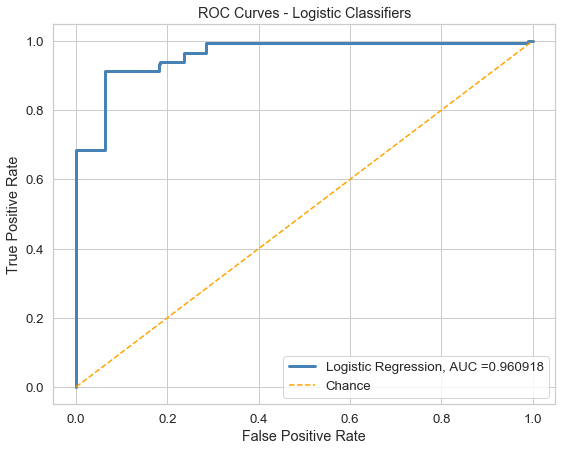

In [146]:
for i,j in skf.split(x,y):
    x_train, x_test = x[i], x[j]
    y_train, y_test = y[i], y[j]
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore")
        logreg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=29).fit(x_train, y_train)
        yhat[j] = logreg.predict_proba(x_test)[:,1]
        
fpr, tpr, thr = metrics.roc_curve(y, yhat, pos_label=1)
auc = metrics.roc_auc_score(y, yhat)
leglog = 'AUC = {:0.4f}'.format(auc)

plt.plot(fpr, tpr, linewidth = 3, color = 'steelblue',
         label='Logistic Regression, AUC ={:2f}'.format(auc))
plt.plot([0,1],[0,1],'--', color='orange', label='Chance')
plt.title('ROC Curves - Logistic Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [147]:
from sklearn.metrics import accuracy_score

predicts = logreg.predict(x_test)
acc = accuracy_score(y_test, predicts)
print('Model Accuracy Score: ' + str(acc))

Model Accuracy Score: 0.9033011003667889


In [148]:
pd.crosstab(y_test, predicts, rownames = ['True'], colnames = ['Predicted'], margins = True)


Predicted,0,1,All
True,,,
0,1070,139,1209
1,151,1639,1790
All,1221,1778,2999


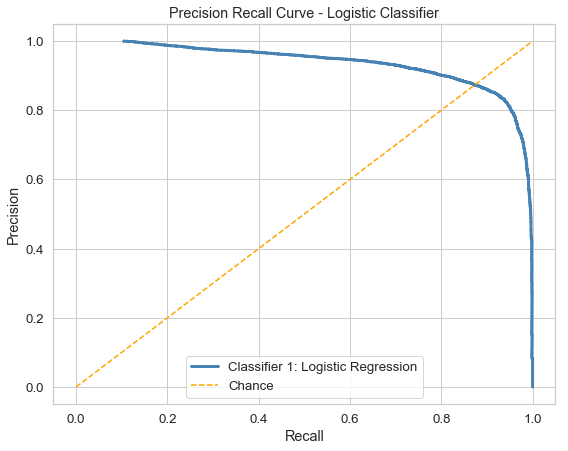

In [149]:
# plot PR curve

prec, rec, thr = metrics.precision_recall_curve(y, yhat)

plt.plot(precl, recl, color = 'steelblue', linewidth = 3, label='Classifier 1: Logistic Regression')
plt.plot([0,1],[0,1],'--', color='orange', label='Chance')

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall Curve - Logistic Classifier')
plt.legend()
plt.show()

**(h)** 
My model did much better than I had hoped and overall performed very well. The ROC and PR curves are plotted above, and as one can see fit a trend that would imply a good prediction and fit with our classifier. This classifier has an AUC of 0.9609, an accuracy score of 0.9033, and the cross tabulation that shows how the model did specifically as a confusion matrix also indicates that this model worked well. In the future, though, I think that the data should be not quite as dumbed down as I made it. I was very fearful that this would be a failed attempt at something creative but with no follow through, but a logitic regression classifier seems to be able to predict how senators will vote in regards to President Trump's agenda much better than sheer chance, and in general very well.

**(i)** 
While data science is becoming more apparent across the social sciences, the interdisciplinary crossing of machine learning and political science is still rare to the point where examples of applications are hard to find. Using this as fuel, I chose a dataset created by FiveThirtyEight that monitored Congress members voting records as well as recorded if that vote was in accordance with President Trump's agenda or not, thus indicating a measure of support that one cannot usually find for congressional members beyond their public comments that may or may not accurately reflect their views. I used all categorical variables from the dataset, including party identification, which congressional session this vote took place, as well as the voting specifics of how exactly the vote was cast, not just in favor or against. The simple logistic regression classifier employed with a cross validation sampling method performed quite well, accuately predicting over 90% of vote behavior. As mentioned previously, this project has truly been creative in intent and therefore certainly needs refinement before any implications can be made, but it does indicate promise in further employing data science techniques in fields like political science, as this is an example of something not done before.